##1. Generate data
Generate data using the sklearn.datasets make_moons method:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=250, noise=0.25, random_state=51)
Use noise parameter noise=0.20 and noise=0.35 to generate two different data sets. Plot
both of them (on separate plots).

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

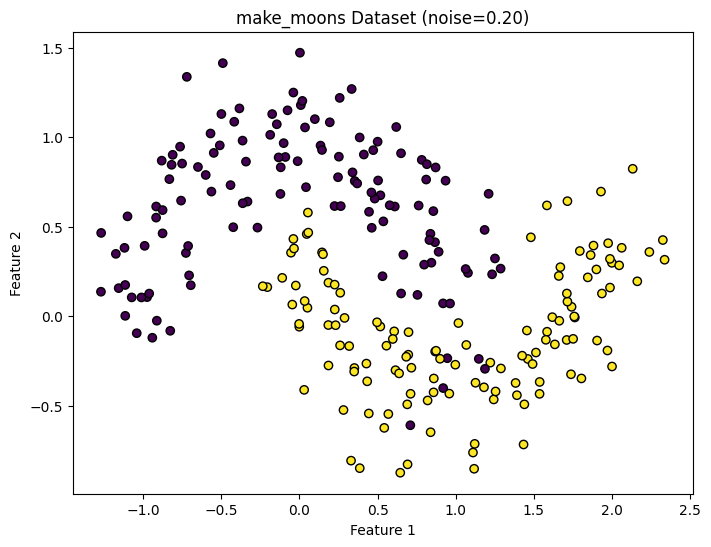

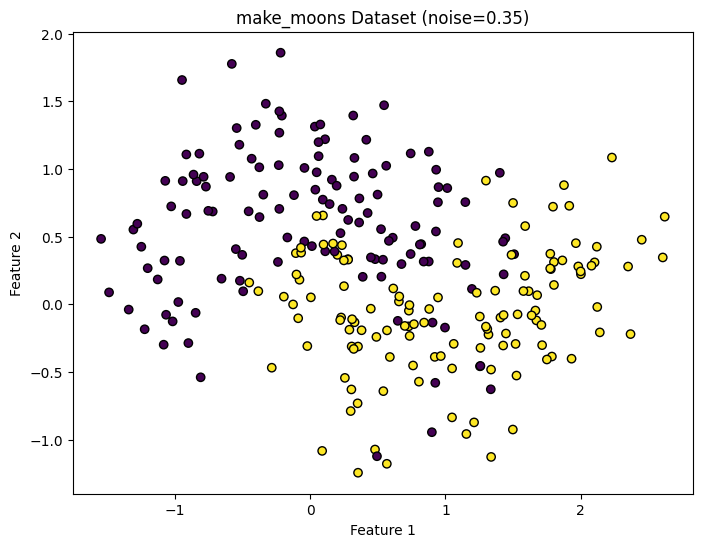

In [2]:
# Generate the first dataset with noise=0.20
X1, y1 = make_moons(n_samples=250, noise=0.20, random_state=51)

# Generate the second dataset with noise=0.35
X2, y2 = make_moons(n_samples=250, noise=0.35, random_state=51)

# Plot the first dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis', edgecolor='k')
plt.title("make_moons Dataset (noise=0.20)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('dataset_1_noise_020.pdf', dpi=300)
plt.show()

# Plot the second dataset
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis', edgecolor='k')
plt.title("make_moons Dataset (noise=0.35)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('dataset_2_noise_035.pdf', dpi=300)
plt.show()

**2. Build a decision tree classifier
Build a decision tree classifier for the noise=0.20 data set. Generate training and test sets.

Decision Tree Accuracy: 0.92


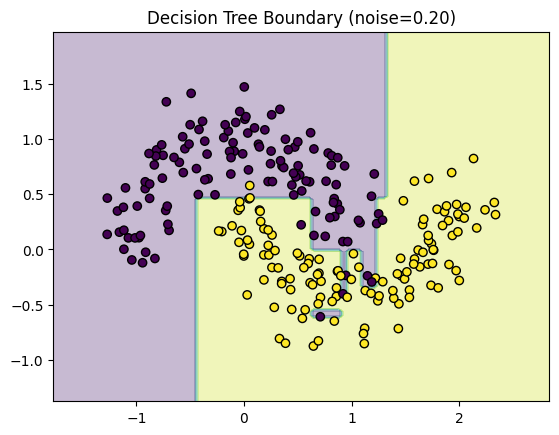

In [3]:
# Split into training (80%) and test sets (20%)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=509
)

# Initialize and train the Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=509)
dt_classifier.fit(X1_train, y1_train)

# Predictions and evaluation
y1_pred = dt_classifier.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)

print(f"Decision Tree Accuracy: {accuracy:.2f}")

DecisionBoundaryDisplay.from_estimator(
    dt_classifier, X1, cmap='viridis', alpha=0.3, eps=0.5, response_method="predict"
)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.title("Decision Tree Boundary (noise=0.20)")
plt.savefig('dt_noise_020.pdf', dpi=300)
plt.show()

The model correctly classifies 92% of test samples, indicating it learns the non-linear moon-shaped boundaries reasonably well.

**3. Experiment with decision tree depth
Build a decision tree classifier for the noise=0.35 data set. Generate training and test sets.
dt_classifier_depth = DecisionTreeClassifier(max_depth=2, random_state=509)
Modify the max_depth=2 parameter to 1, 3, 4, etc. to see how the parameter affects the
accuracy performance.

In [4]:
# splitting dataset with noise 0.35
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=509
)

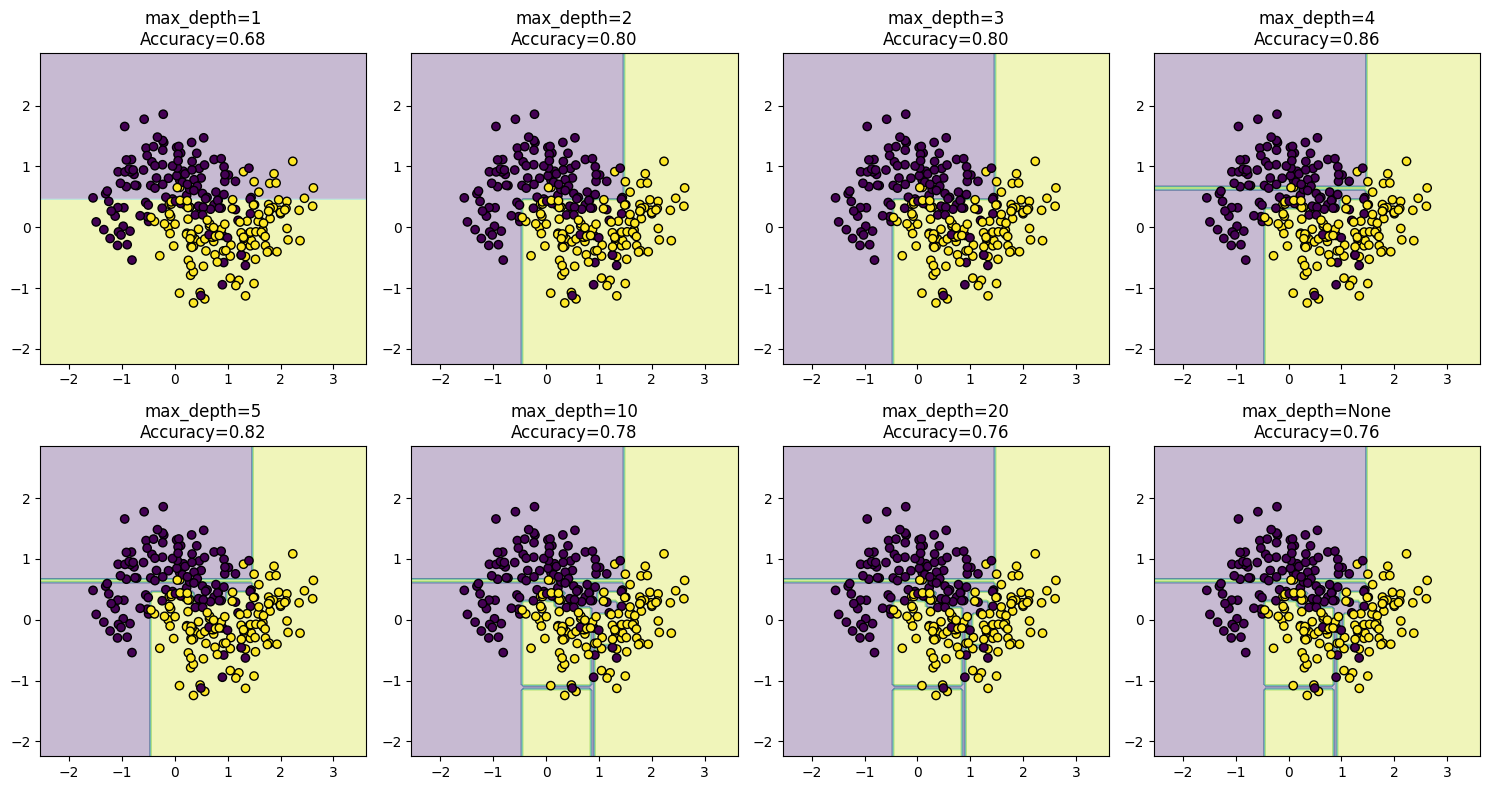

In [5]:
# Plot decision boundaries for different depths
depths_to_plot = [1, 2, 3, 4, 5, 10, 20, None]
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for ax, depth in zip(axes.ravel(), depths_to_plot):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=509)
    dt.fit(X2_train, y2_train)

    DecisionBoundaryDisplay.from_estimator(
        dt, X2, cmap='viridis', alpha=0.3, response_method="predict", ax=ax
    )
    ax.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k')
    ax.set_title(f"max_depth={depth}\nAccuracy={accuracy_score(y2_test, dt.predict(X2_test)):.2f}")

plt.tight_layout()
plt.savefig('dept_accuracy_comparison_noise_035.pdf', dpi=300)
plt.show()

Depth=1: Linear-like boundary (underfitting).

Depth=4: Clean separation of moons (optimal).

Depth=20: Jagged, noisy boundaries (overfitting).